In [37]:
##########################################
##          SurveyDataWireframe         ##
##########################################

%matplotlib qt

In [70]:
#Imports
import csv
import collections
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np

from scipy.interpolate import griddata
import numpy.ma as ma


In [71]:
#Set up data format
DataPoint = collections.namedtuple('DataPoint', ('lat','lon','depth','confidence'))
DataPoints = []

In [72]:
#Open file and read values
with open('sonar_logs/harborSurvey.csv', 'rt') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in filereader:
        newPoint = DataPoint(lat=row[2], lon=row[3], depth=row[0], confidence=row[1])
        DataPoints.append(newPoint)   

In [73]:
#Remove the first line (label)
for x in range(0, 140):
    DataPoints.pop(0)

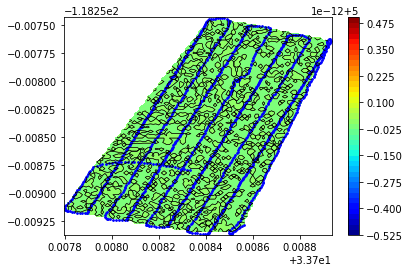

In [102]:
#Data Lists
X = []
Y = []
Z = []

#Populate Lists
for p in DataPoints:
    X.append(float(p.lat))
    Y.append(float(p.lon))
    Z.append(float(5))
    #Z.append( -1 * float(p.depth))
    
# # Make the grid
xi = np.linspace(min(X),max(X),100)
yi = np.linspace(min(Y),max(Y),100)

# Grid the data
# griddata(points, values, xi, method='')
# Methods: Linear, Nearest, Cubic
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

# Depth change lines
CS = plt.contour(xi,yi,zi,40,linewidths=0.5,colors='k')

#Color surface
CS = plt.contourf(xi,yi,zi,40,cmap=plt.cm.jet)

plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(X,Y,marker='o',c='b',s=3)
plt.show()


In [103]:
print(len(Z))

1398
